In [707]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Normalization
plt.style.use("ggplot")

In [708]:
df = pd.read_csv("data (1).csv")

In [709]:
df

,x,y,z
0,307.615086,235.201412,a
1,347.042034,208.803949,a
2,324.644404,253.274084,a
3,323.911386,237.216229,a
4,279.295639,275.633240,a
...,...,...,...
528,214.601135,132.115543,b
529,236.049842,124.447737,b
530,196.565067,80.275258,b
531,216.754377,158.256015,b


In [710]:
pos = df[df['z'] == 'a']
neg = df[df['z'] == 'b']

In [711]:
encoding = {'a': 1, 'b': 0}

In [ ]:
X = np.hstack((np.array(df['x']).reshape(-1, 1), np.array(df['y']).reshape(-1, 1)))
y = (df.replace({'z':encoding}))['z']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Text(0.5, 1.0, 'y vs x')

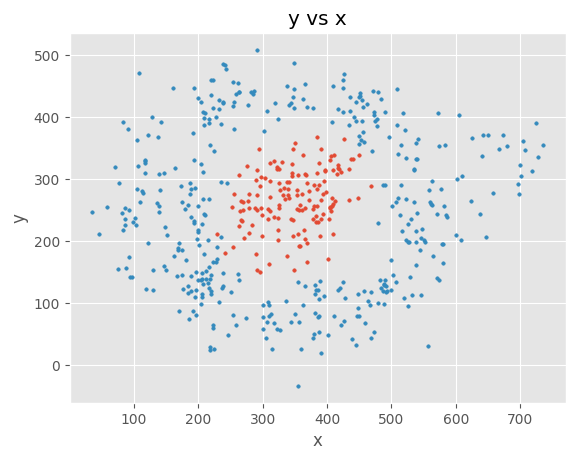

In [713]:
plt.scatter(pos['x'], pos['y'], s=6)
plt.scatter(neg['x'], neg['y'], s=6)
plt.xlabel("x")
plt.ylabel("y")
plt.title("y vs x")

In [681]:
bin_class_model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(units=3, activation="sigmoid", name="l1"),
        tf.keras.layers.Dense(units=1, activation="sigmoid", name="output"),
    ]
)

bin_class_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=["accuracy"]
    )

In [688]:
norm_l = Normalization(axis = -1)
norm_l.adapt(X_train)
X_train_norm = norm_l(X_train)
norm_l.adapt(X_test)
X_test_norm = norm_l(X_test)

In [ ]:
history = bin_class_model.fit(X_train_norm, y_train, epochs=50)

Text(0.5, 1.0, 'accuracy over epochs')

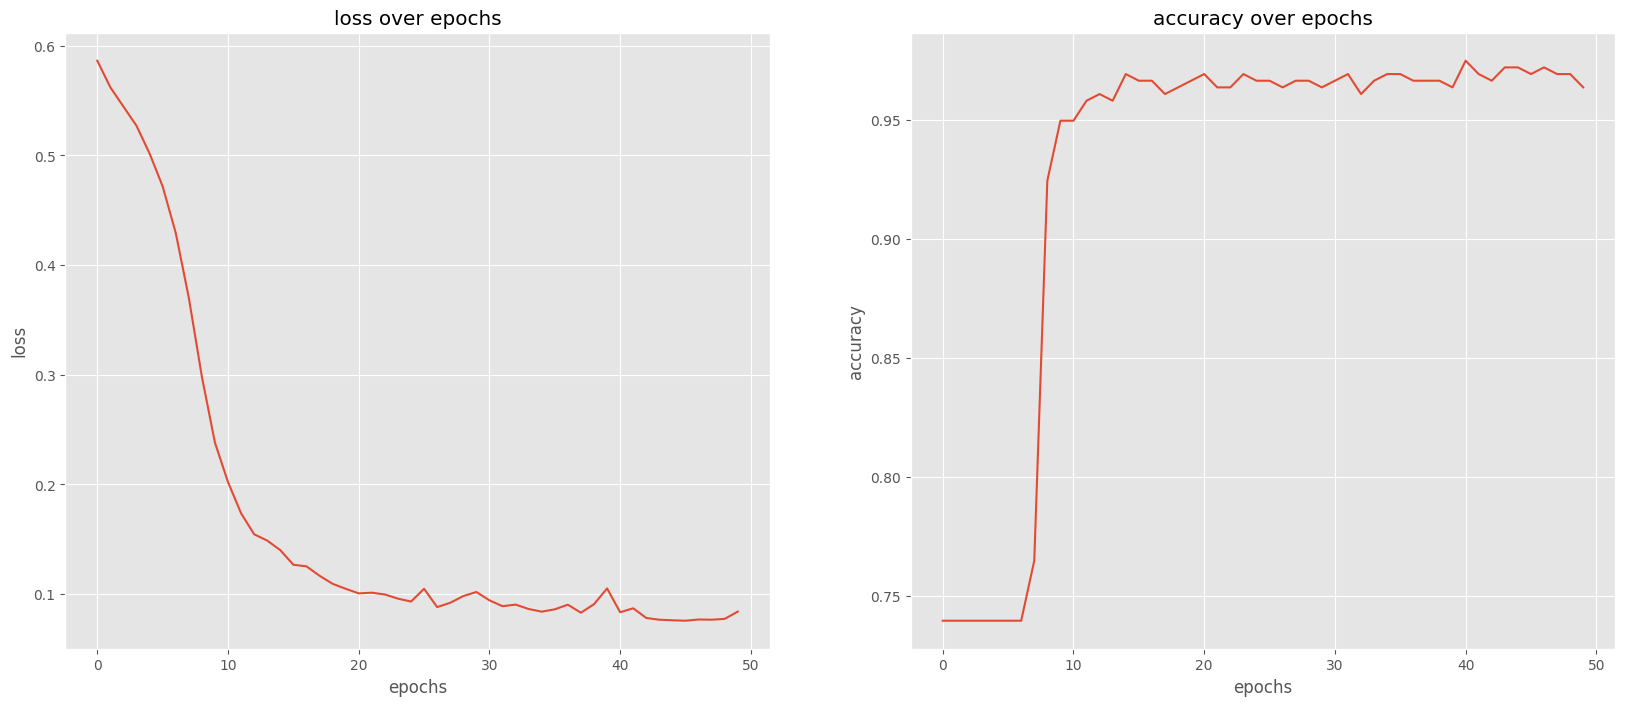

In [718]:
fig,ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].plot(np.arange(50), history.history['loss'])
ax[0].set_xlabel("epochs")
ax[0].set_ylabel("loss")
ax[0].set_title("loss over epochs")
ax[1].plot(np.arange(50), history.history['accuracy'])
ax[1].set_xlabel("epochs")
ax[1].set_ylabel("accuracy")
ax[1].set_title("accuracy over epochs")


In [689]:
pred = bin_class_model.predict(X_train_norm)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [690]:
bin_class_model.evaluate(X_test_norm, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9598 - loss: 0.1011  


[0.08940113335847855, 0.9659090638160706]

In [717]:
bin_class_model.evaluate(X_train_norm, y_train)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9790 - loss: 0.0708 


[0.07841195911169052, 0.9691876769065857]

In [674]:
pred[pred > 0.5] = 1
pred[pred <= 0.5] = 0

In [675]:
pos = pred[pred == 1]
neg = pred[pred == 0]

In [676]:
pos_index = np.zeros_like(pred)
neg_index = np.zeros_like(pred)


for i in range(X_train.shape[0]):
  if pred[i] == 1:
    pos_index[i] = True
    neg_index[i] = False
  elif pred[i] == 0:
    pos_index[i] = False
    neg_index[i] = True

In [677]:
pos_index = pos_index.reshape(-1, ).astype(bool)
neg_index = neg_index.reshape(-1, ).astype(bool)

In [679]:
pos_data_points = X_train[pos_index]
neg_data_points = X_train[neg_index]

Text(0.5, 1.0, 'Predicted of Training set')

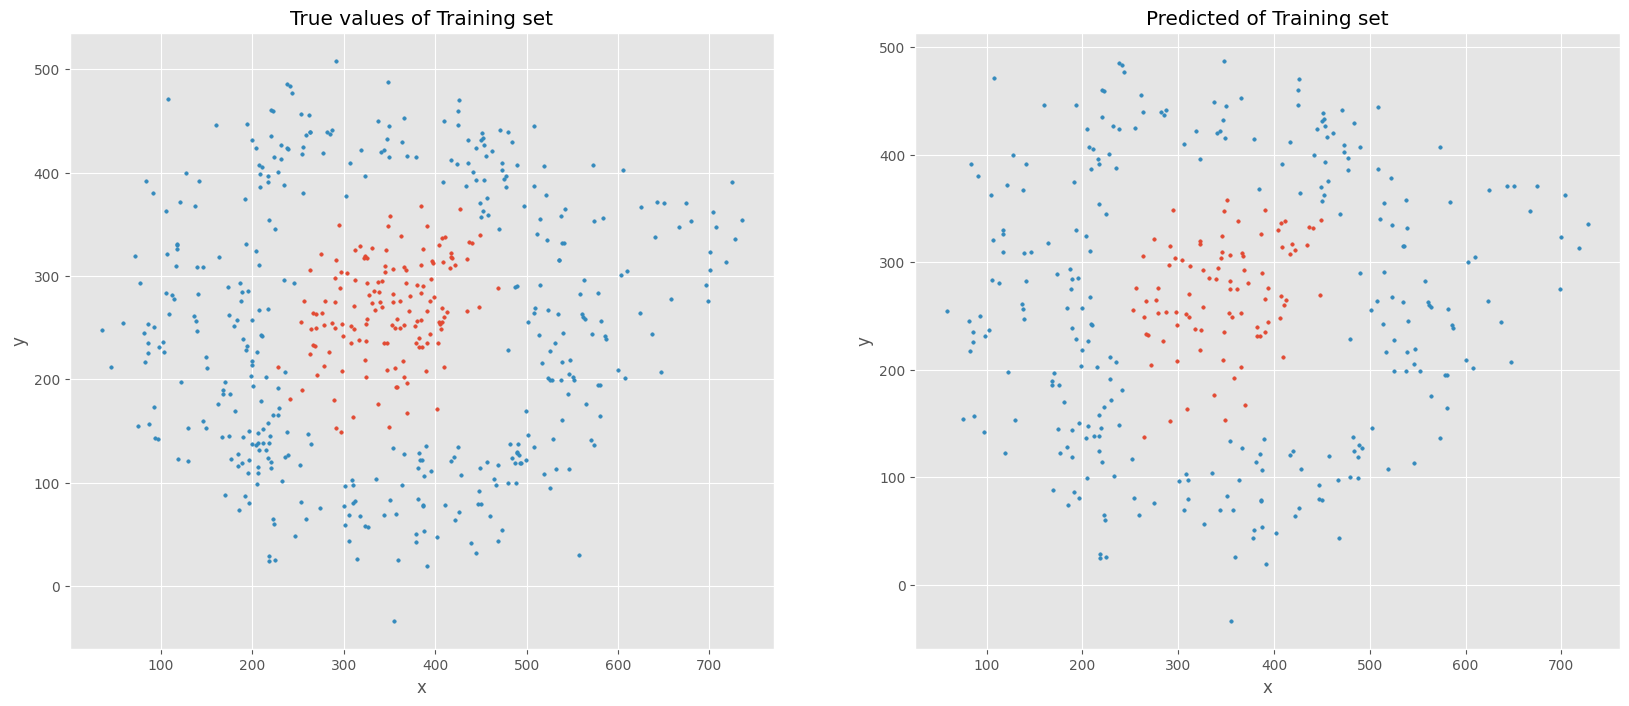

In [715]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].scatter(pos['x'], pos['y'],s=6)
ax[0].scatter(neg['x'], neg['y'],s=6)
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].set_title("True values of Training set")
ax[1].scatter(pos_data_points[:, 0], pos_data_points[:, 1],s=6)
ax[1].scatter(neg_data_points[:, 0], neg_data_points[:, 1],s=6)
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].set_title("Predicted of Training set")


In [692]:
pos_test = X_test[y_test == 1]
neg_test = X_test[y_test == 0]

In [695]:
y_test_pred = bin_class_model.predict(X_test_norm)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [697]:
y_test_pred[y_test_pred > 0.5] = 1
y_test_pred[y_test_pred <= 0.5] = 0

In [701]:
y_test_pred = y_test_pred.reshape(-1, )

In [703]:
pos_test_pred = X_test[y_test_pred == 1]
neg_test_pred = X_test[y_test_pred == 0]

Text(0.5, 1.0, 'Model Predictions')

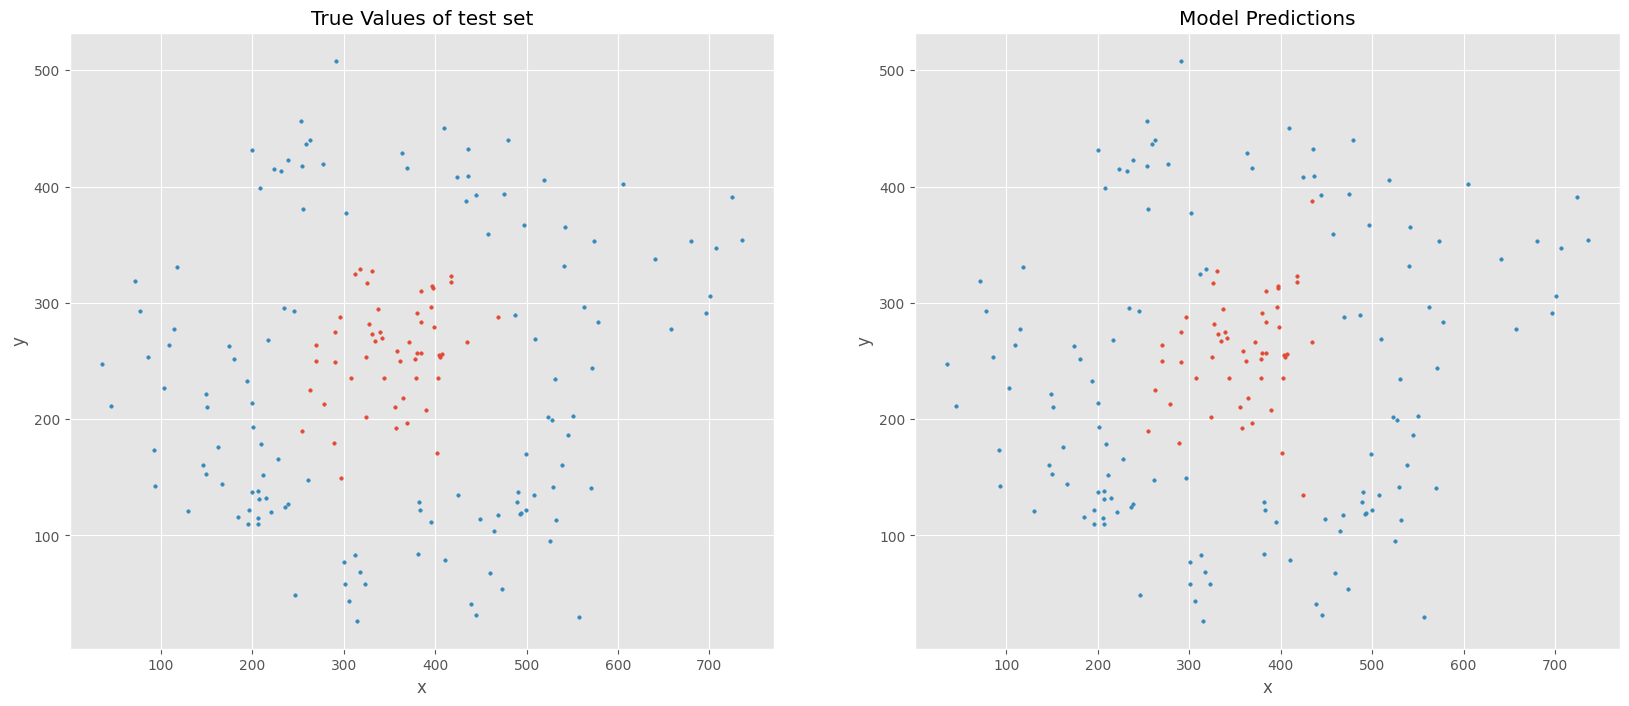

In [704]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))

ax[0].scatter(pos_test[:, 0], pos_test[:, 1],s=6)
ax[0].scatter(neg_test[:, 0], neg_test[:, 1],s=6)
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].set_title("True Values of test set")
ax[1].scatter(pos_test_pred[:, 0], pos_test_pred[:, 1],s=6)
ax[1].scatter(neg_test_pred[:, 0], neg_test_pred[:, 1],s=6)
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].set_title("Model Predictions")